# Test agents

In [242]:
import sys

sys.path.insert(1, '../src')
import agents as ag
import lightbox as lb
#to not restart kernel on jupyter each time
import importlib
importlib.reload(lb)
importlib.reload(ag)

TODO BIC


<module 'agents' from '../src/agents.py'>

## Creation and print

In [243]:
env = lb.LightBox()

In [244]:
age = ag.AbstractAgent(env)

In [254]:
print(age)

Abstract agent, currently at iteration 1 and learned 0 options


## BIC

In [252]:
s0 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s1 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)

In [253]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)


In [249]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s0)

In [250]:
print(age.FMDP[1]["cpts"][1].compute_BIC())

-32.76578237213694


In [251]:
print(age.FMDP[1]["cpts"][1].compute_BIC())

-32.76578237213694


In [246]:
age.FMDP[1]["cpts"][1].distrib_vect

{1: [8, 0],
 2: [8, 0],
 3: [8, 0],
 4: [8, 0],
 5: [8, 0],
 6: [8, 0],
 7: [8, 0],
 8: [8, 0],
 9: [8, 0],
 10: [8, 0],
 11: [8, 0],
 12: [8, 0],
 13: [8, 0],
 14: [8, 0],
 15: [8, 0],
 16: [8, 0],
 17: [8, 0],
 18: [8, 0],
 19: [8, 0],
 20: [8, 0]}

In [43]:
age.start()

Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement
Not implemented in abstract
To implement


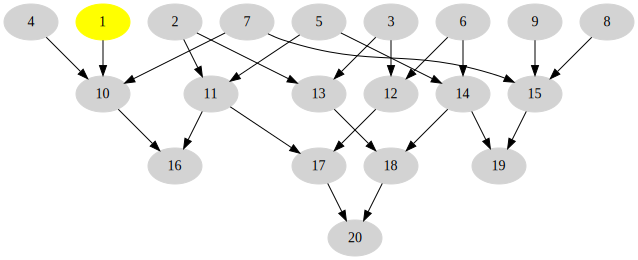

In [44]:
env.show()

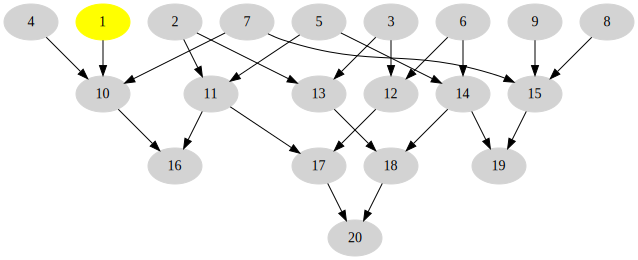

In [39]:
age.actions[1].execute()
env.show()

In [45]:
from anytree import Node, RenderTree
pop = Node("pop")
pep = Node("pep", parent=pop)
pap = Node("pap")
pap.parent = pop

In [48]:
print(RenderTree(pop))

Node('/pop')
└── Node('/pop/pep')


In [47]:
pap.parent=None

In [69]:
print(len(pep.children))

0


In [51]:
print(pap)

Node('/pap')


In [52]:
pap2 = Node("pap")

In [53]:
print(pap2)

Node('/pap')


In [54]:
print(pap)

Node('/pap')


In [74]:
False == 0

True

In [77]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [78]:
thisdict["c"]

KeyError: 'c'

In [79]:
print( "brand" in thisdict)

True


In [81]:
for i in thisdict:
    print(i)

brand
model
year


In [82]:
1/2

0.5

In [83]:
np.log(1)

NameError: name 'log' is not defined